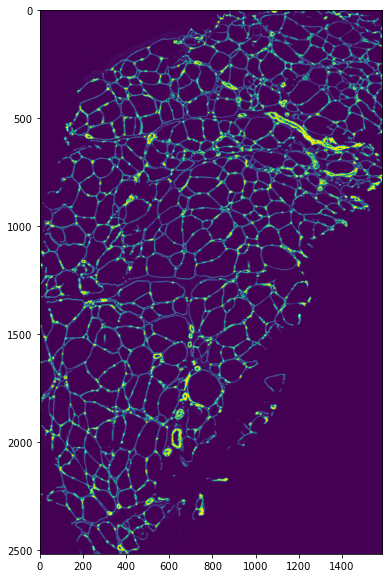

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import json
from PIL import Image, ImageDraw

img = cv2.imread('../input/img.jpg', cv2.IMREAD_GRAYSCALE)

%matplotlib inline

plt.figure(figsize=(20, 10))
plt.imshow(img)
plt.show()

In [66]:
def makeMask(size,tuples):
    black = Image.new('1', size)
    imd = ImageDraw.Draw(black)
    imd.polygon(tuples,fill="white",outline="white")
    return(np.array(black))

with open('../input/H7711_1ann.geojson') as f: annotation_data = json.load(f)

n_annotations = len(annotation_data["features"])

blob = annotation_data["features"][0]["geometry"]

if blob["type"] == "LineString": coords = blob["coordinates"]
if blob["type"] == "Polygon": coords = blob["coordinates"][0]

tuples = [tuple(coord) for coord in coords]

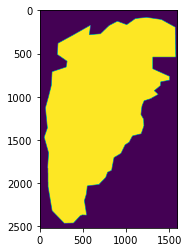

In [67]:
img_size = Image.fromarray(img).size

mask = makeMask(img_size, tuples)

%matplotlib inline

plt.imshow(mask)
plt.show()

In [71]:
masked = cv2.bitwise_and(img, img, mask = np.logical_and(mask,img))

%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(masked)
plt.show()

error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'bitwise_and'
> Overload resolution failed:
>  - mask data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'mask'


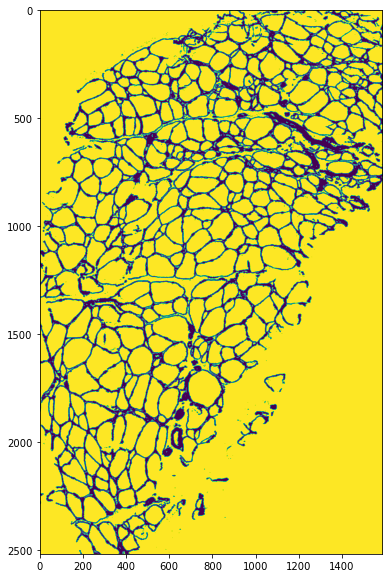

In [62]:
ret, thresh = cv2.threshold(masked, np.mean(masked), 255, cv2.THRESH_BINARY_INV)

%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(thresh)
plt.show()

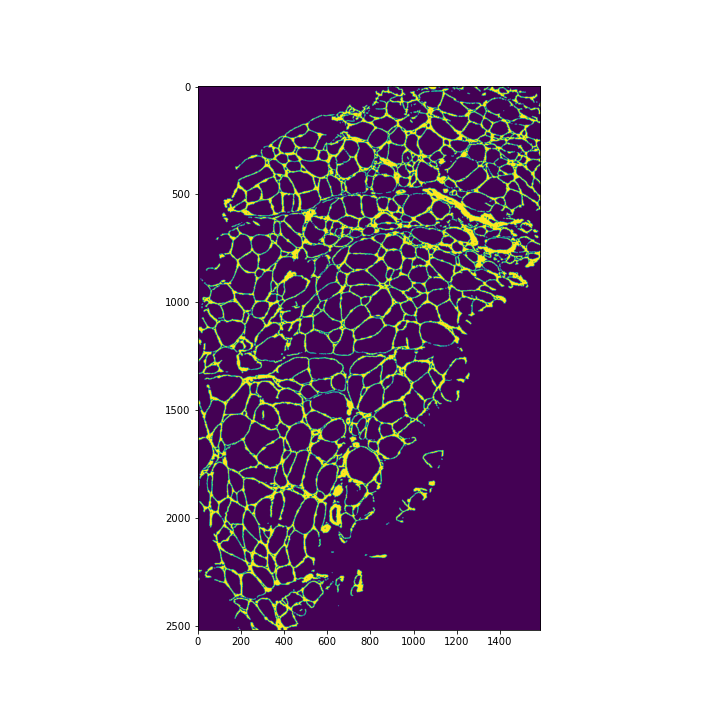

In [46]:
kernel = np.ones((2, 2), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

%matplotlib widget

plt.figure(figsize=(10, 10))
plt.imshow(opening)
plt.show()

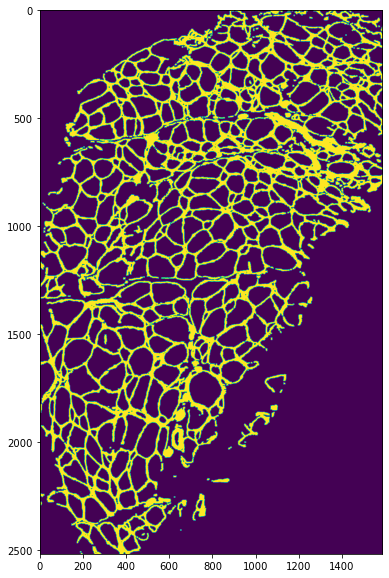

In [47]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(sure_bg)
plt.show()

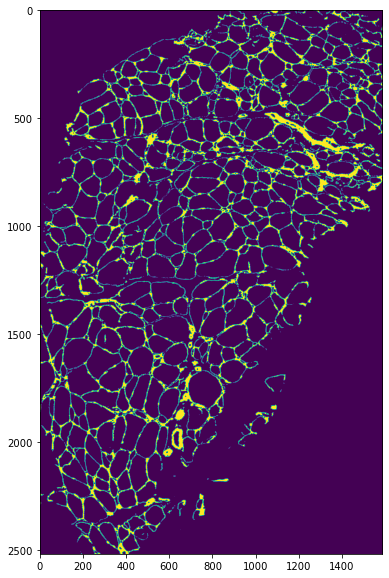

In [48]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.1 * dist_transform.max(), 255, 0)

%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(sure_fg)
plt.show()

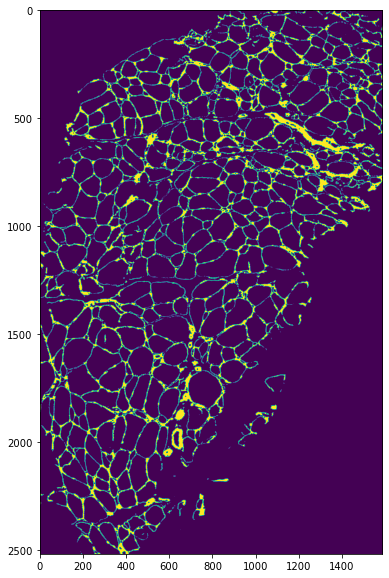

In [58]:
sure_fg = np.uint8(sure_fg)

%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(sure_fg)
plt.show()

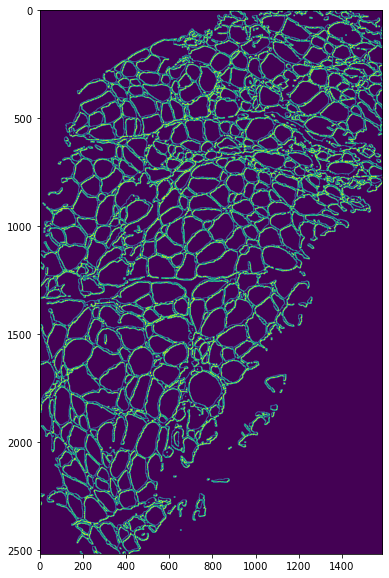

In [59]:
unknown = cv2.subtract(sure_bg, sure_fg)

%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(unknown)
plt.show()

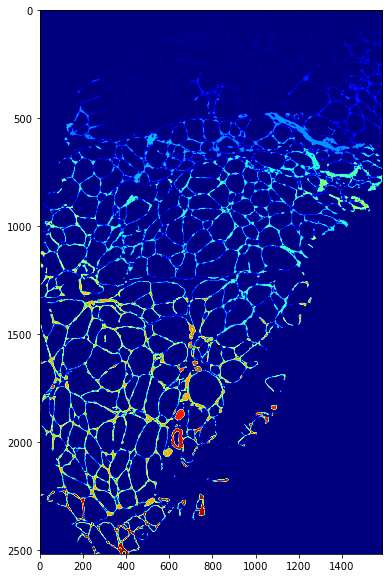

In [56]:
ret, markers = cv2.connectedComponents(sure_fg)

%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.show()

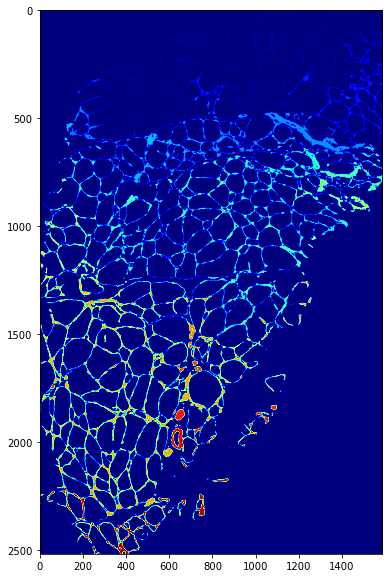

In [57]:
markers = markers + 1
markers[unknown == 255] = 0

%matplotlib inline

plt.figure(figsize=(10, 10))
plt.imshow(markers, cmap='jet')
plt.show()

In [51]:
markers = cv2.watershed(img, markers)
img[markers == -1] = [255, 0, 0]

error: OpenCV(4.5.5) /home/conda/feedstock_root/build_artifacts/libopencv_1641992572944/work/modules/imgproc/src/segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'watershed'
